## Data Cleaning

The dataframe will be checked on:
- variable types
- missing values
- reasonable values
- duplicates

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# horizontal scrolling
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

**Load downloaded data**

In [5]:
# import data into a pandas df
df_house = pd.read_csv('data/king_county_data.csv')
df = df_house.copy()
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Check variable types**

In [7]:
df.dtypes # the only categorial variable is date --> transform to datetime function

date              object
price            float64
house_id           int64
id                 int64
id.1               int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [8]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')

**Check for duplicates**

In [28]:
df.duplicated().value_counts() # no duplicates

False    21597
Name: count, dtype: int64

In [29]:
# drop the doubled id column
df.drop('id.1', inplace =True, axis=1)

**Check for missing values** by `.info` and the package `missingno`

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   bedrooms       21597 non-null  float64       
 5   bathrooms      21597 non-null  float64       
 6   sqft_living    21597 non-null  float64       
 7   sqft_lot       21597 non-null  float64       
 8   floors         21597 non-null  float64       
 9   waterfront     19206 non-null  float64       
 10  view           21534 non-null  float64       
 11  condition      21597 non-null  int64         
 12  grade          21597 non-null  int64         
 13  sqft_above     21597 non-null  float64       
 14  sqft_basement  21145 non-null  float64       
 15  yr_built       2159

<Axes: >

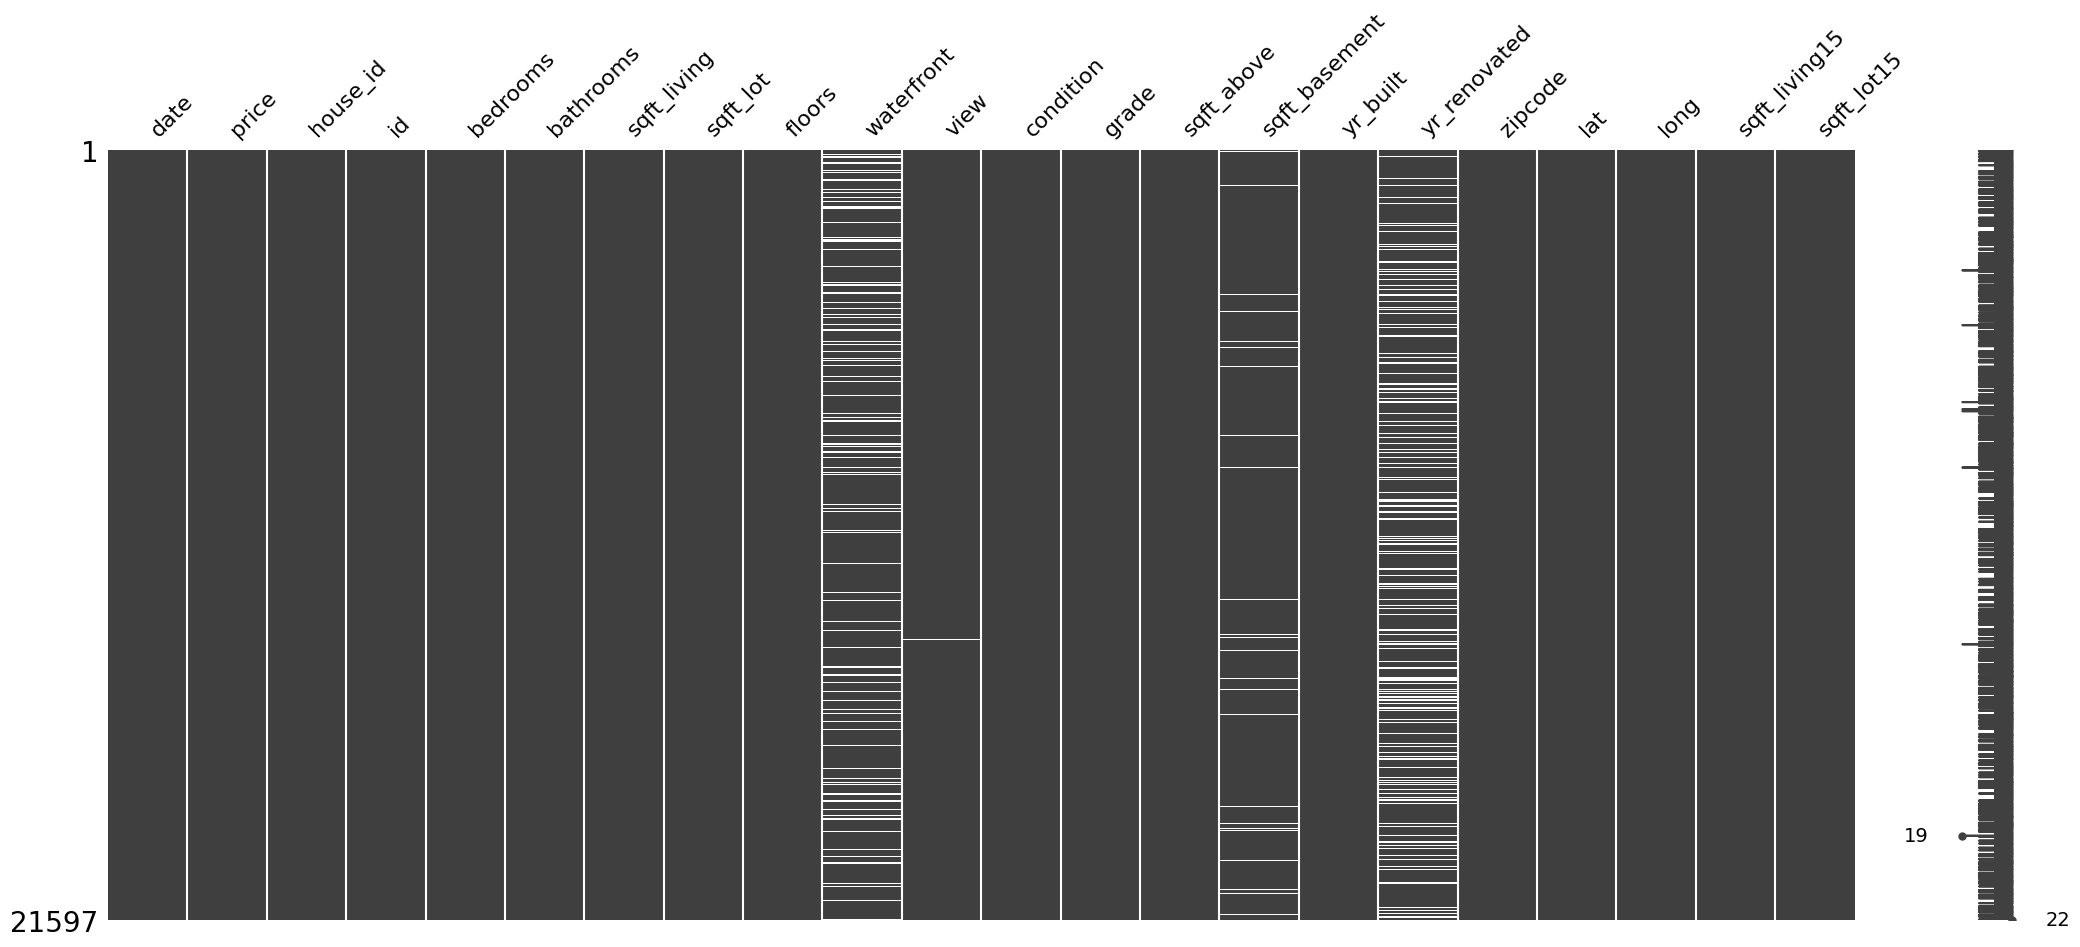

In [31]:
mso.matrix(df) # missing values in 4 columns without a clear pattern

<Axes: >

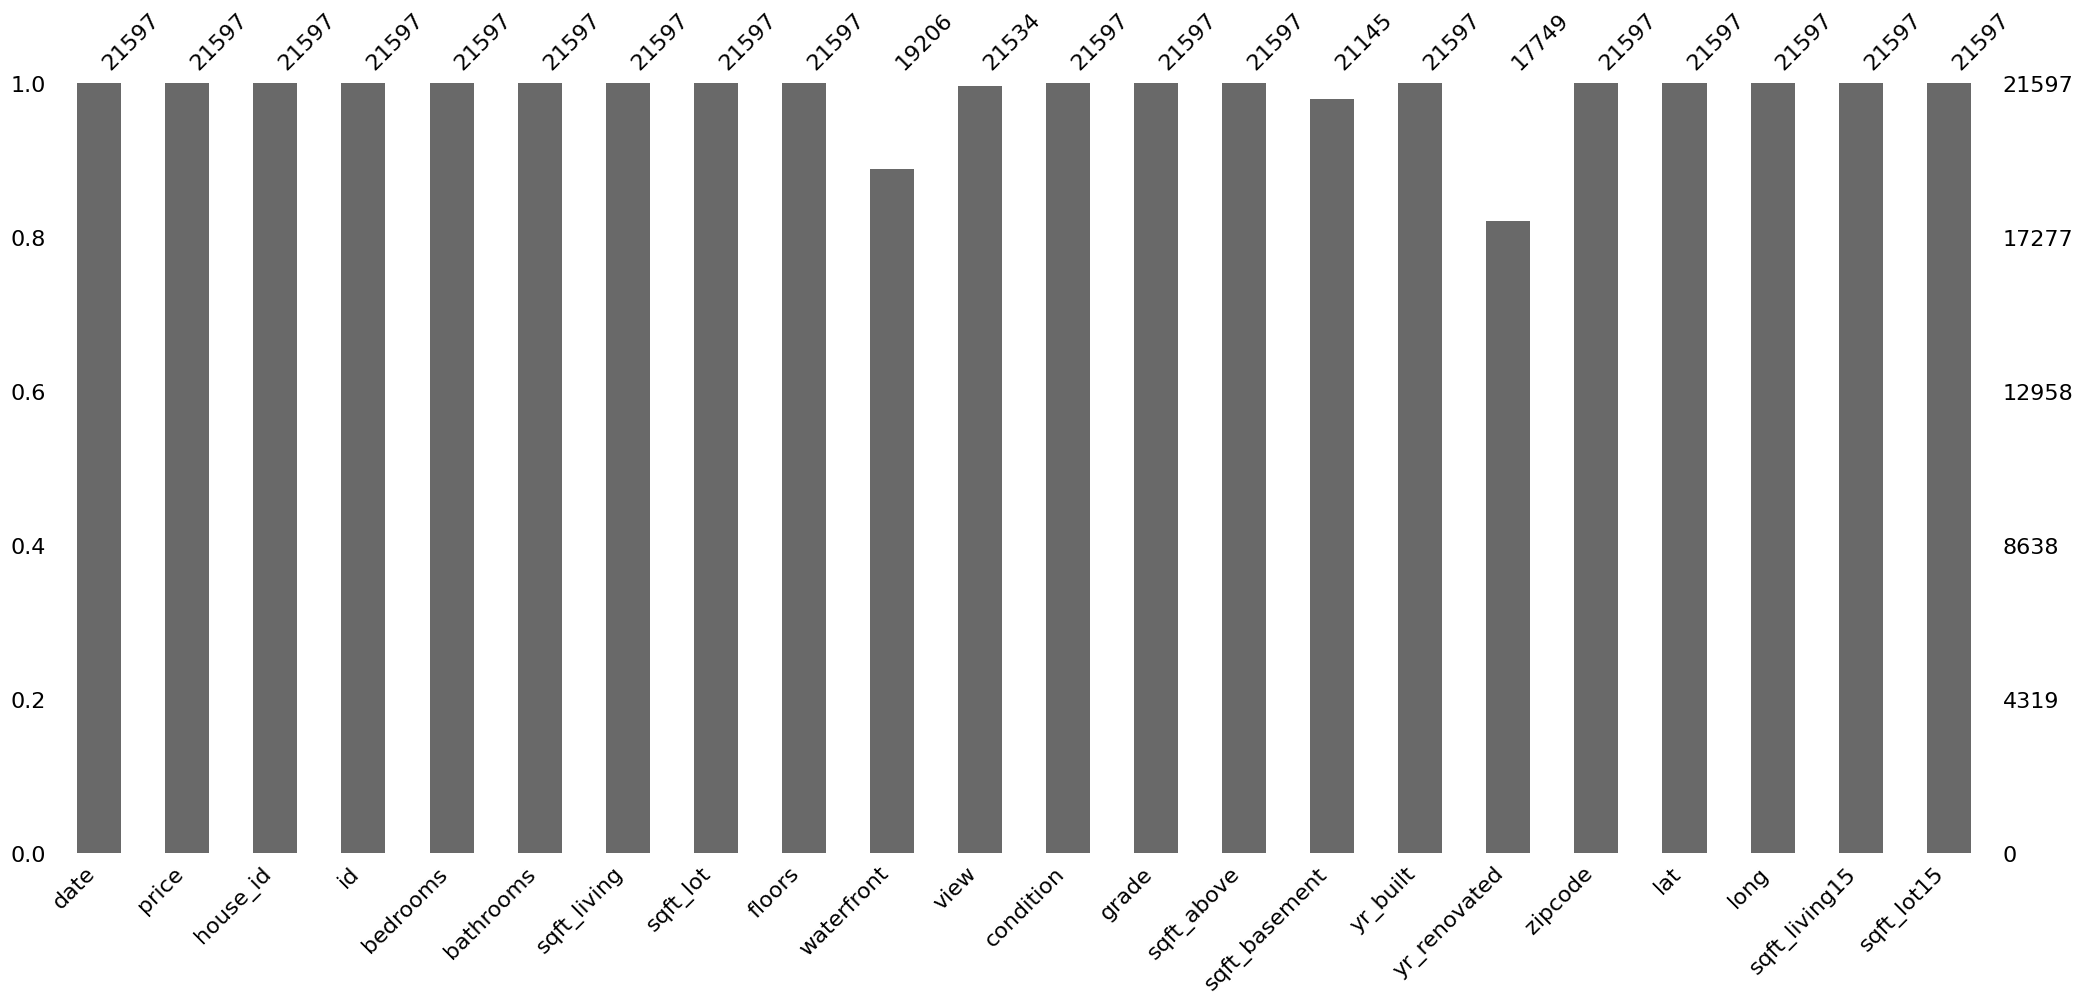

In [32]:
mso.bar(df) # to see % of missing values per column

**Missing values in waterfront = 15%, sqft_basement =5%, yr_renovated = 20%, in view = 1%.**
To have a more detailed look at these features, the function `.unique` is applied.

In [33]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [34]:
df[df.waterfront.isna()] 

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,7129300520,1,3.00,1.00,1180.00,5650.00,1.00,NaN,...,7,1180.00,0.00,1955,0.00,98178,47.51,-122.26,1340.00,5650.00
10,2015-04-03,662500.00,1736800520,11,3.00,2.50,3560.00,9796.00,1.00,NaN,...,8,1860.00,1700.00,1965,0.00,98007,47.60,-122.14,2210.00,8925.00
23,2014-05-16,252700.00,8091400200,24,2.00,1.50,1070.00,9643.00,1.00,NaN,...,7,1070.00,0.00,1985,NaN,98030,47.35,-122.17,1220.00,8386.00
40,2014-07-15,625000.00,5547700270,41,4.00,2.50,2570.00,5520.00,2.00,NaN,...,9,2570.00,0.00,2000,NaN,98074,47.61,-122.03,2470.00,5669.00
55,2014-05-12,885000.00,9822700295,56,4.00,2.50,2830.00,5000.00,2.00,NaN,...,9,2830.00,0.00,1995,0.00,98105,47.66,-122.29,1950.00,5000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,2014-10-17,350000.00,5087900040,21579,4.00,2.75,2500.00,5995.00,2.00,NaN,...,8,2500.00,0.00,2008,0.00,98042,47.37,-122.11,2530.00,5988.00
21582,2014-10-13,541800.00,8956200760,21583,4.00,2.50,3118.00,7866.00,2.00,NaN,...,9,3118.00,0.00,2014,0.00,98001,47.29,-122.26,2673.00,6500.00
21586,2014-06-26,224000.00,844000965,21587,3.00,1.75,1500.00,11968.00,1.00,NaN,...,6,1500.00,0.00,2014,0.00,98010,47.31,-122.00,1320.00,11303.00
21587,2014-08-25,507250.00,7852140040,21588,3.00,2.50,2270.00,5536.00,2.00,NaN,...,8,2270.00,0.00,2003,0.00,98065,47.54,-121.88,2270.00,5731.00


For 2391 houses it is not clear if they are at the waterfront. The only possibility to impute the values would be to check their location. For time-efficiency reasons and because of the abundance of houses this step is skipped.

The missing values regarding the waterfront, basement and the renovation year are considered as the negation of the feature, meaning no waterfront, no basement and no renovation. Just the view differs in this logic. But as this feature is not of elementar importance for the stakeholder, the missing values are not imputed. 

**Check of the reasonability of values**

In [19]:
df.describe().transpose().round(2)

,count,mean,min,25%,50%,75%,max,std
date,21597,2014-10-29 04:20:38.171968512,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21597.00,540296.57,78000.00,322000.00,450000.00,645000.00,7700000.00,367368.14
house_id,21597.00,4580474287.77,1000102.00,2123049175.00,3904930410.00,7308900490.00,9900000190.00,2876735715.75
id,21597.00,10799.00,1.00,5400.00,10799.00,16198.00,21597.00,6234.66
id.1,21597.00,4580474287.77,1000102.00,2123049175.00,3904930410.00,7308900490.00,9900000190.00,2876735715.75
bedrooms,21597.00,3.37,1.00,3.00,3.00,4.00,33.00,0.93
bathrooms,21597.00,2.12,0.50,1.75,2.25,2.50,8.00,0.77
sqft_living,21597.00,2080.32,370.00,1430.00,1910.00,2550.00,13540.00,918.11
sqft_lot,21597.00,15099.41,520.00,5040.00,7618.00,10685.00,1651359.00,41412.64
floors,21597.00,1.49,1.00,1.00,1.50,2.00,3.50,0.54


The values of yr_renovated seem to be wrong, as  the max value is 20150.

In [5]:
df.yr_renovated.unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [7]:
# change the column, as there is a 0 to much
df.yr_renovated = df.yr_renovated.apply(lambda x: x/10).round(0)
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [38]:
# detailed look at the building year of houses without a renovation year
df[df.yr_renovated.isna()].yr_built.unique()

array([1933, 1927, 1985, 1915, 1948, 2000, 2003, 1950, 2008, 1968, 2005,
       1956, 1941, 1979, 2006, 1978, 1984, 1900, 1987, 1926, 2014, 1923,
       1901, 1961, 1977, 1966, 1942, 1947, 1976, 1911, 1982, 1989, 1960,
       1997, 1969, 1980, 1928, 1916, 1922, 2004, 1954, 2010, 2002, 1943,
       1994, 1940, 2001, 2007, 1988, 1953, 1918, 1999, 1952, 1902, 1925,
       1990, 1910, 1924, 1967, 1921, 1965, 1934, 1974, 1963, 1983, 1955,
       1998, 2009, 1993, 1975, 1939, 1995, 1920, 1991, 1949, 1962, 1945,
       1905, 1959, 1906, 1951, 1957, 1970, 1996, 1981, 1986, 1992, 1944,
       1919, 1903, 1972, 1913, 1958, 2015, 1907, 1971, 1930, 1964, 1909,
       1946, 1973, 1917, 2011, 2013, 1938, 1937, 1914, 2012, 1935, 1912,
       1936, 1908, 1932, 1929, 1931, 1904], dtype=int64)

A lot of these houses are historical, but a visit to the house would be necessary to validate if a renovation was made and just not noted. So all missing values are considered as 0, meaning no renovation.

In [39]:
# assign zero to nan in yr_renovated
df=df.fillna({'yr_renovated':0})

Optional: checking all unique values of important features as number of bathrooms, floors, waterfront and basement

In [40]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [41]:
df.head()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,7129300520,1,3.00,1.00,1180.00,5650.00,1.00,NaN,...,7,1180.00,0.00,1955,0.00,98178,47.51,-122.26,1340.00,5650.00
1,2014-12-09,538000.00,6414100192,2,3.00,2.25,2570.00,7242.00,2.00,0.00,...,7,2170.00,400.00,1951,19910.00,98125,47.72,-122.32,1690.00,7639.00
2,2015-02-25,180000.00,5631500400,3,2.00,1.00,770.00,10000.00,1.00,0.00,...,6,770.00,0.00,1933,0.00,98028,47.74,-122.23,2720.00,8062.00
3,2014-12-09,604000.00,2487200875,4,4.00,3.00,1960.00,5000.00,1.00,0.00,...,7,1050.00,910.00,1965,0.00,98136,47.52,-122.39,1360.00,5000.00
4,2015-02-18,510000.00,1954400510,5,3.00,2.00,1680.00,8080.00,1.00,0.00,...,8,1680.00,0.00,1987,0.00,98074,47.62,-122.05,1800.00,7503.00
